In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Predict person `Sex` based on `Age`, `Height` and `Weight`

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df = df.query('age>18')
df.head(3)

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0


In [3]:
plt.rc('font', **{'size':18})

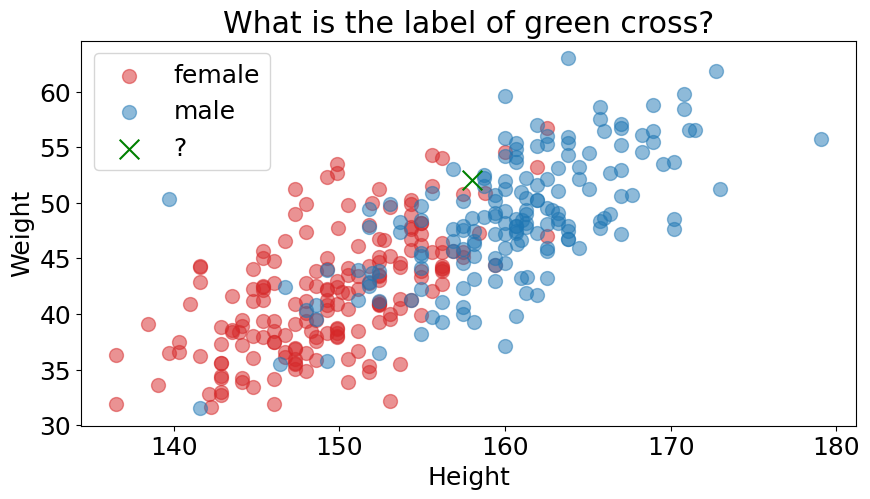

In [4]:
plt.figure(figsize=(10, 5))

plt.scatter(df.query("male==0")['height'], df.query("male==0")['weight'],
            c='tab:red', s=100, alpha=0.5, label='female')
plt.scatter(df.query("male==1")['height'], df.query("male==1")['weight'],
            c='tab:blue', s=100, alpha=0.5, label='male')
plt.scatter(158, 52, marker='x', s=200, color='green', label='?')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('What is the label of green cross?');

# Let's use a simple KNN classification approach

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
df_train, df_test = train_test_split(df, test_size=0.33, shuffle=True, random_state=1)

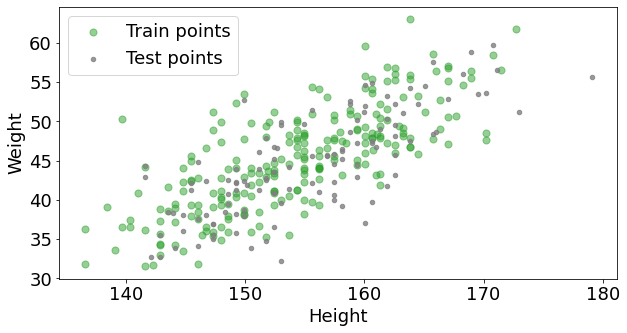

In [7]:
plt.figure(figsize=(10, 5))
plt.scatter(df_train['height'], df_train['weight'],
            c='tab:green', s=50, alpha=0.5, label='Train points')
plt.scatter(df_test['height'], df_test['weight'],
            c='tab:gray', s=20, alpha=0.8, label='Test points')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend();

# K = 1

In [8]:
X_train, y_train = df_train[['height', 'weight']], df_train['male']
X_test, y_test = df_test[['height', 'weight']], df_test['male']

In [9]:
knn_clf = KNeighborsClassifier(n_neighbors=1)

knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred_test = knn_clf.predict(X_test)

In [10]:
accuracy_score(y_train, y_pred_train)

1.0

In [11]:
accuracy_score(y_test, y_pred_test)

0.7739130434782608

# K = 2,3,4,...10

In [12]:
acc_test = []
acc_train = []

for k in range(1,10):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    acc_test.append(accuracy_score(y_test, y_pred))
    acc_train.append(accuracy_score(y_train, y_pred_train))

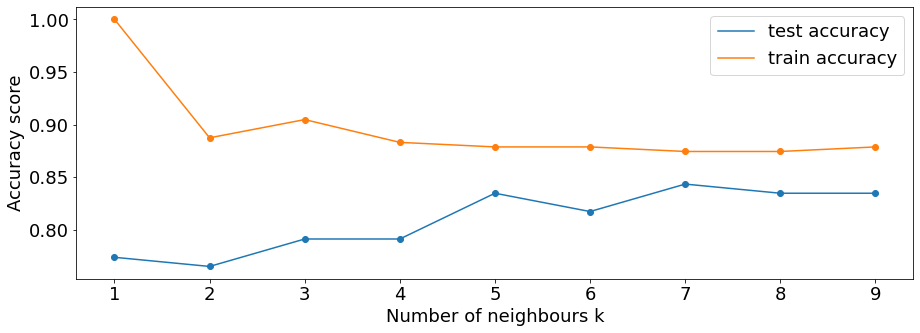

In [13]:
plt.figure(figsize=(15,5))

plt.plot(range(1,10), acc_test, label='test accuracy');
plt.plot(range(1,10), acc_train, label='train accuracy');

plt.scatter(range(1,10), acc_test);
plt.scatter(range(1,10), acc_train);

plt.xlabel('Number of neighbours k')
plt.ylabel('Accuracy score');
plt.legend();

# Increase K

In [14]:
acc_test = []
acc_train = []
max_k = 20
for k in range(1,max_k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    acc_test.append(accuracy_score(y_test, y_pred))
    acc_train.append(accuracy_score(y_train, y_pred_train))

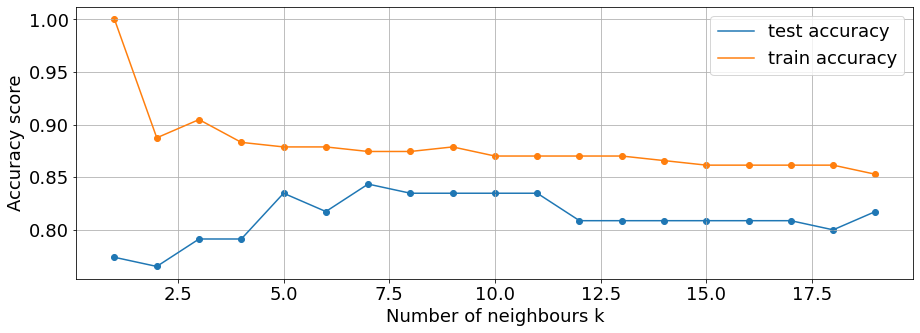

In [15]:
plt.figure(figsize=(15,5))

plt.plot(range(1,max_k), acc_test, label='test accuracy');
plt.plot(range(1,max_k), acc_train, label='train accuracy');

plt.scatter(range(1,max_k), acc_test);
plt.scatter(range(1,max_k), acc_train);

plt.xlabel('Number of neighbours k')
plt.ylabel('Accuracy score');
plt.grid()
plt.legend();

In [16]:
np.argmax(acc_test)

6

In [17]:
acc_test[np.argmax(acc_test)]

0.8434782608695652

In [18]:
best_clf_knn = KNeighborsClassifier(6)
best_clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

# Questions

1. How to get probability instead of class label?
2. How to adapt for multiclass classification?
3. How to adapt for regression? 
4. What if we have same number of different classes amongst neighbours (e.g. 2 "male" and 2 "female" )?
5. How to interpret KNN?
6. KNN generalization. How good will be predictions on kids?

# Other parameters KNN

1. Choose distance metric (euclidean, minkowski, cosine, etc.).
2. Samples weighting.

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df_kids = df.query('age<=18')

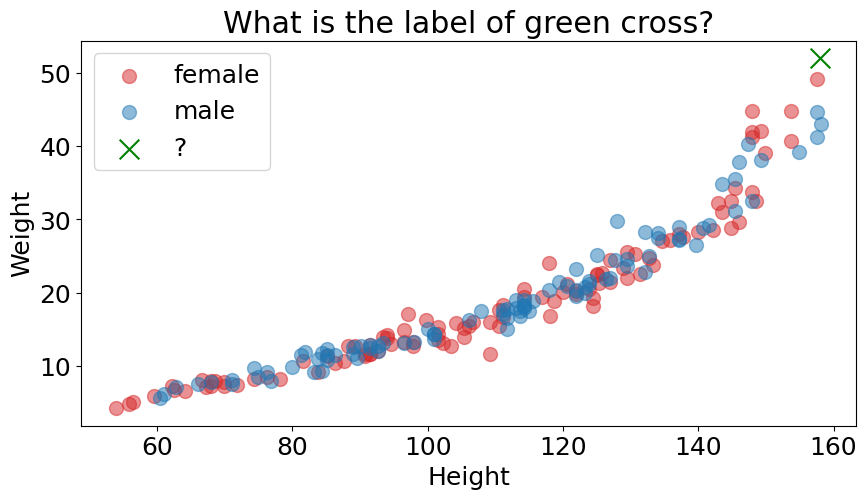

In [6]:
plt.figure(figsize=(10, 5))

plt.scatter(df_kids.query("male==0")['height'], df_kids.query("male==0")['weight'],
            c='tab:red', s=100, alpha=0.5, label='female')
plt.scatter(df_kids.query("male==1")['height'], df_kids.query("male==1")['weight'],
            c='tab:blue', s=100, alpha=0.5, label='male')
plt.scatter(158, 52, marker='x', s=200, color='green', label='?')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.title('What is the label of green cross?');

In [20]:
y_pred = best_clf_knn.predict(df_kids[['height', 'weight']])
print(accuracy_score(df_kids['male'], y_pred))

0.5303030303030303


# Next week


1. Home assignment:
    - Space Titanic (?)
    - Compare probabilities and class labels for Naive Bayes
2. Linear models for regression, regularisation l1, l2
3. Regression metrics
4. More on model selection and hyperparameters tuning
5. Handling missing values, and categorical features